In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ratio = pd.read_csv('ratio.csv')
bank = pd.read_csv('bank.csv')
bank

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,conm,curcd,stalt,costat,sic
0,1004,20000531,1999.0,INDL,C,D,STD,AAR CORP,USD,NaN,A,5080
1,1004,20010531,2000.0,INDL,C,D,STD,AAR CORP,USD,NaN,A,5080
2,1004,20020531,2001.0,INDL,C,D,STD,AAR CORP,USD,NaN,A,5080
3,1004,20030531,2002.0,INDL,C,D,STD,AAR CORP,USD,NaN,A,5080
4,1004,20040531,2003.0,INDL,C,D,STD,AAR CORP,USD,NaN,A,5080
...,...,...,...,...,...,...,...,...,...,...,...,...
53901,270989,20071231,2007.0,INDL,C,D,STD,CHINACAST EDUCATION CORP,USD,NaN,I,8200
53902,271841,20071231,2007.0,INDL,C,D,STD,GAFISA SA,USD,NaN,A,1520
53903,272699,20070630,2007.0,INDL,C,D,STD,ENSYNC INC,USD,NaN,A,3690
53904,277918,20061231,2006.0,INDL,C,D,STD,ENOVA SYSTEMS INC,USD,NaN,A,3714


In [3]:
ratio.columns

Index(['gvkey', 'adate', 'qdate', 'public_date', 'CAPEI', 'bm', 'evm',
       'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'dpr',
       'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce',
       'efftax', 'aftret_eq', 'aftret_invcapx', 'aftret_equity', 'pretret_noa',
       'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap',
       'totdebt_invcap', 'capital_ratio', 'int_debt', 'int_totdebt', 'cash_lt',
       'invt_act', 'rect_act', 'debt_at', 'debt_ebitda', 'short_debt',
       'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf',
       'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio',
       'intcov', 'intcov_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio',
       'cash_conversion', 'inv_turn', 'at_turn', 'rect_turn', 'pay_turn',
       'sale_invcap', 'sale_equity', 'sale_nwc', 'rd_sale', 'adv_sale',
       'staff_sale', 'accrual', 'ptb', 'PEG_trailing', 'DIVYIELD',
       'PEG_1yrforward', 'PEG_ltgforwar

In [4]:
bankrupt = bank
bankrupted = bankrupt[['GVKEY','fyear','stalt','sic','conm']]
bankrupted =bankrupted.rename(columns = {'GVKEY':'gvkey'})
bankrupted['fyear']= bankrupted['fyear'].apply(lambda x :str(x)[:4])
bankrupted

,gvkey,fyear,stalt,sic,conm
0,1004,1999,NaN,5080,AAR CORP
1,1004,2000,NaN,5080,AAR CORP
2,1004,2001,NaN,5080,AAR CORP
3,1004,2002,NaN,5080,AAR CORP
4,1004,2003,NaN,5080,AAR CORP
...,...,...,...,...,...
53901,270989,2007,NaN,8200,CHINACAST EDUCATION CORP
53902,271841,2007,NaN,1520,GAFISA SA
53903,272699,2007,NaN,3690,ENSYNC INC
53904,277918,2006,NaN,3714,ENOVA SYSTEMS INC


In [5]:
bankrupted_by_year = bankrupted[bankrupted['stalt']=='TL']
bankrupted_by_year = bankrupted_by_year.drop_duplicates(subset = 'gvkey', keep ='first')
bankrupted_by_year = bankrupted_by_year.groupby(['fyear'])['gvkey'].count()


In [6]:
ratio['adate'] = ratio['adate'].apply(lambda x: str(x))
ratio['fyear']= ratio['adate'].str[:4]


In [7]:
# ratio[ratio['gvkey']==1004].head(50)

In [8]:
merged = ratio.merge(bankrupted,how = 'left',left_on=['gvkey','fyear'],right_on=['gvkey','fyear'],suffixes = ('_left','_right'))

In [9]:

sic = bankrupted.drop_duplicates(subset = 'gvkey',keep ='last')[['gvkey','sic','conm']]
merged = merged.merge(sic,how = 'left', left_on = 'gvkey',right_on='gvkey')

In [10]:
merged['sic_y'] = merged['sic_y'].apply(lambda x: str(x)[:4])

In [11]:
merged

,gvkey,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,PEG_trailing,DIVYIELD,PEG_1yrforward,PEG_ltgforward,fyear,stalt,sic_x,conm_x,sic_y,conm_y
0,1004,19990531.0,19991130,20000131,18.333,0.858,6.916,11.055,11.195,11.195,...,0.427,1.92%,0.920,0.730,1999,NaN,5080.0,AAR CORP,5080,AAR CORP
1,1013,19991031.0,19991031,20000131,102.783,0.174,17.421,48.130,49.207,115.680,...,20.646,NaN,5.153,4.521,1999,NaN,NaN,NaN,3661,ADC TELECOMMUNICATIONS INC
2,1034,19981231.0,19990930,20000131,63.318,0.339,11.702,27.200,28.333,28.333,...,NaN,.529%,0.903,1.139,1998,NaN,NaN,NaN,2834,ALPHARMA INC -CL A
3,1038,19990331.0,19990930,20000131,25.730,0.308,10.124,-9.435,-9.435,-7.162,...,-0.005,NaN,-0.091,-0.669,1999,NaN,7830.0,AMC ENTERTAINMENT INC -OLD,7830,AMC ENTERTAINMENT INC -OLD
4,1045,19981231.0,19990930,20000131,10.336,1.022,6.045,14.124,14.583,13.798,...,0.117,NaN,0.459,1.643,1998,NaN,NaN,NaN,4512,AMERICAN AIRLINES GROUP INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500456,266316,20061231.0,20070930,20071231,-3.915,0.411,-4.323,-28.000,-28.000,-28.000,...,NaN,NaN,-0.392,NaN,2006,NaN,2834.0,ICAGEN INC,2834,ICAGEN INC
500457,266319,20061231.0,20070930,20071231,-1.756,0.258,-2.566,-5.379,-5.379,-5.379,...,NaN,NaN,NaN,NaN,2006,NaN,7370.0,MMRGLOBAL INC,7370,MMRGLOBAL INC
500458,270989,20061231.0,20070930,20071231,NaN,0.834,17.400,28.500,29.739,38.000,...,NaN,NaN,0.309,NaN,2006,NaN,NaN,NaN,8200,CHINACAST EDUCATION CORP
500459,272699,20070630.0,20070930,20071231,NaN,0.428,-14.979,-10.645,-10.645,-9.612,...,NaN,NaN,NaN,NaN,2007,NaN,3690.0,ENSYNC INC,3690,ENSYNC INC


In [12]:

merged['public_year'] = merged['public_date'].apply(lambda x: int(str(x)[:4]))
# merged['public_year'] = merged['public_date'].apply(lambda x :x)


In [13]:
#drop when adate is nan
merged = merged.dropna(subset = ['adate'])
#fill na for if bankrupte column, if bankrupted ==1, others = 0
merged['stalt'] = merged['stalt'].fillna(0)
merged['stalt'] = merged['stalt'].apply(lambda x: 1 if x!=0 else 0 )

In [14]:
print('Bankrupcy in years')
merged_bankrupt = merged[merged['stalt']==1]
merged_bankrupt= merged_bankrupt.drop_duplicates(subset = 'gvkey',keep = 'first')
merged_bankrupt = merged_bankrupt.groupby(['public_year'])['gvkey'].count()
merged_bankrupt

Bankrupcy in years


public_year
2000     6
2001    10
2002     7
2003     3
2004     3
2005     2
2006     1
2007     2
Name: gvkey, dtype: int64

# EDA on financial ratios and bankrupcy

In [15]:

companies_by_year = (merged.drop_duplicates(subset = ['public_year','gvkey'],keep = 'last')).groupby(['public_year'])['gvkey'].count()

###### how many companies are there everyyear and how many goes bankrupt

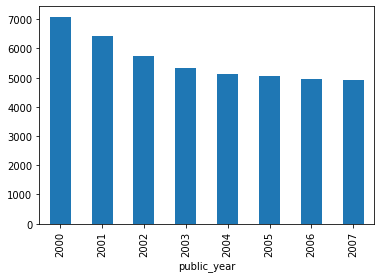

In [16]:
companies_by_year.plot(kind='bar',x='year',y='number of companies ')

In [53]:
companies_by_year

public_year
2000    7090
2001    6414
2002    5749
2003    5330
2004    5129
2005    5058
2006    4964
2007    4908
Name: gvkey, dtype: int64

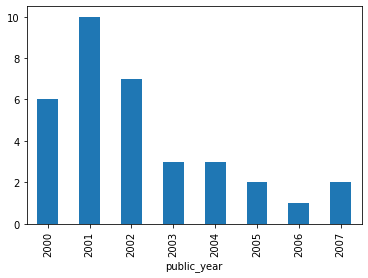

In [17]:
merged_bankrupt.plot(kind='bar',x='year',y='number of companies')

###### company by industry

In [18]:
def separate(x):
    if x<1000:
        return 'agriculture'
    elif x>=1000 and x<1500:
        return 'mineral industries'
    elif x>= 1500 and x<1800:
        return 'construction'
    elif x>=2000 and x<4000:
        return 'manufacturing'
    elif x>=4000 and x<4899:
        return 'transportation'
    elif x>=4950 and x<5200:
        return 'wholesale'
    elif x>=5200 and x<6000:
        return 'retail'
    elif x>=7000 and x<8900:
        return 'service'
    else:
        return 'public admin'

In [19]:
#drop nan
industry = merged.dropna(subset = ['sic_y'])
industry = industry[industry['sic_y']!='nan']
industry['sic_y'] = industry['sic_y'].apply(lambda x : x.replace('.',''))
industry['sic_y'] = industry['sic_y'].apply(lambda x: int(x))
industry['industry'] = industry['sic_y'].apply(separate)

In [20]:
industry


,gvkey,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,PEG_1yrforward,PEG_ltgforward,fyear,stalt,sic_x,conm_x,sic_y,conm_y,public_year,industry
0,1004,19990531.0,19991130,20000131,18.333,0.858,6.916,11.055,11.195,11.195,...,0.920,0.730,1999,0,5080.0,AAR CORP,5080,AAR CORP,2000,wholesale
1,1013,19991031.0,19991031,20000131,102.783,0.174,17.421,48.130,49.207,115.680,...,5.153,4.521,1999,0,NaN,NaN,3661,ADC TELECOMMUNICATIONS INC,2000,manufacturing
2,1034,19981231.0,19990930,20000131,63.318,0.339,11.702,27.200,28.333,28.333,...,0.903,1.139,1998,0,NaN,NaN,2834,ALPHARMA INC -CL A,2000,manufacturing
3,1038,19990331.0,19990930,20000131,25.730,0.308,10.124,-9.435,-9.435,-7.162,...,-0.091,-0.669,1999,0,7830.0,AMC ENTERTAINMENT INC -OLD,7830,AMC ENTERTAINMENT INC -OLD,2000,service
4,1045,19981231.0,19990930,20000131,10.336,1.022,6.045,14.124,14.583,13.798,...,0.459,1.643,1998,0,NaN,NaN,4512,AMERICAN AIRLINES GROUP INC,2000,transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500456,266316,20061231.0,20070930,20071231,-3.915,0.411,-4.323,-28.000,-28.000,-28.000,...,-0.392,NaN,2006,0,2834.0,ICAGEN INC,2834,ICAGEN INC,2007,manufacturing
500457,266319,20061231.0,20070930,20071231,-1.756,0.258,-2.566,-5.379,-5.379,-5.379,...,NaN,NaN,2006,0,7370.0,MMRGLOBAL INC,7370,MMRGLOBAL INC,2007,service
500458,270989,20061231.0,20070930,20071231,NaN,0.834,17.400,28.500,29.739,38.000,...,0.309,NaN,2006,0,NaN,NaN,8200,CHINACAST EDUCATION CORP,2007,service
500459,272699,20070630.0,20070930,20071231,NaN,0.428,-14.979,-10.645,-10.645,-9.612,...,NaN,NaN,2007,0,3690.0,ENSYNC INC,3690,ENSYNC INC,2007,manufacturing


###### industry number

industry
agriculture             17
construction            78
manufacturing         2901
mineral industries     276
public admin          1874
retail                 463
service               1604
transportation         349
wholesale              275
Name: gvkey, dtype: int64

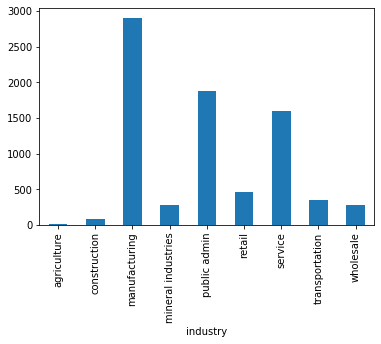

In [54]:
number_company = industry.drop_duplicates(subset = 'gvkey')
number_company = number_company.groupby(['industry'])['gvkey'].count()
number_company.plot(kind='bar',x='type',y='number of companies')
number_company

###### industry range for every columns

In [22]:
industry_list = industry['industry'].unique().tolist()
columns_list=industry.columns.tolist()

list_df = {}
for ind in industry_list:
    all_comp = industry[industry['industry']==ind]
    max_ = []
    min_ = []
    mean_= []
    column = []
    for col in columns_list[5:-11]:
        co_max = industry[col].max()
        co_min = industry[col].min()
        co_mean = (industry[col].dropna()).mean()
        max_.append(co_max)
        min_.append(co_min)
        mean_.append(co_mean)
        column.append(col)
    df= pd.DataFrame(data = column)
    df['max'] = max_
    df['min'] = min_
    df['mean']= mean_
    list_df.update({ind:df})
    


        

In [ ]:
list_df['manufacturing']

###### bankrupcy by industry

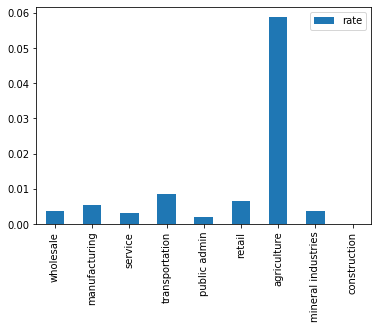

In [24]:
ind_bankrupt = []
indu = []
for ind in industry_list:
    all_comp = industry[industry['industry']==ind]
    br = len(all_comp[all_comp['stalt']==1].drop_duplicates(subset = 'gvkey',keep ='last'))
    al = len(all_comp.drop_duplicates(subset = 'gvkey',keep = 'last'))
    rate = br/al
    indu.append(ind)
    ind_bankrupt.append(rate)
indu_rate = pd.DataFrame(data = ind_bankrupt,index = indu)
# indu_rate = indu_rate.set_index
# indu_rate['bankrupcy rate'] = ind_bankrupt
indu_rate = indu_rate.rename(columns={0:'rate'})
indu_rate
indu_rate.plot(kind='bar')    

In [25]:
indu_rate

,rate
wholesale,0.003636
manufacturing,0.005515
service,0.003117
transportation,0.008596
public admin,0.002134
retail,0.006479
agriculture,0.058824
mineral industries,0.003623
construction,0.000000


###### bankrupt industry by year

In [26]:
b = industry[industry['stalt']==1].drop_duplicates(subset = 'gvkey',keep ='first')

In [27]:
b_by_y = b.groupby(['public_year','industry'])['gvkey'].count()

In [55]:
b_by= b.groupby(['industry'])['gvkey'].count()

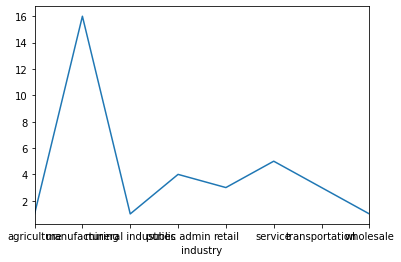

In [57]:
b_by.plot()

###### industry total number trends

In [29]:
i_by_yr = industry.drop_duplicates(subset = ['public_year','gvkey'],keep = 'last').groupby(['public_year','industry'])['gvkey'].count()

In [30]:
i_by_yr.unstack()

industry,agriculture,construction,manufacturing,mineral industries,public admin,retail,service,transportation,wholesale
public_year,,,,,,,,,
2000,16,67,2348,190,1417,397,1351,285,243
2001,15,66,2360,198,1433,378,1356,285,236
2002,15,57,2198,179,1346,334,1153,253,204
2003,15,51,2061,165,1285,314,1018,228,187
2004,13,47,1994,163,1268,310,928,226,175
2005,12,49,1993,171,1236,298,887,230,176
2006,11,48,1951,187,1236,288,846,221,168
2007,10,49,1929,197,1238,270,827,206,160


In [31]:
wholesale = industry[industry['industry'] == 'wholesale']

In [32]:
wholesale = wholesale.drop_duplicates(subset = ['public_year','gvkey'])

In [33]:
year_list = wholesale['public_year'].unique().tolist()

In [34]:
b_com= industry[industry['stalt']==1].drop_duplicates(subset = 'gvkey',keep ='first')

In [35]:
total = []
count = 0
for year in year_list:
    y_c = b_com[b_com['public_year']==year]
    l_comp = y_c['conm_x'].tolist()
    com_name = ''
    for i in l_comp:
        com_name = com_name + '['+i+']'+', '
        count+=1
    total.append(com_name)
    

In [36]:
df1 = pd.DataFrame(data = total,index = year_list)
print(df1)

                                                      0
2000  [HAYES LEMMERZ INTL INC], [ZANY BRAINY INC], [...
2001  [ARMSTRONG HOLDINGS INC], [SALIENT 3 COMMUN IN...
2002  [BETHLEHEM STEEL CORP], [FEDERAL-MOGUL HOLDING...
2003  [NTELOS INC], [UNITED AIRLINES HOLDINGS INC], ...
2004  [CARDIODYNAMICS INTL CORP], [CONGOLEUM CORP  -...
2005               [FAB INDUSTRIES INC], [XANADOO CO], 
2006                                       [REIS INC], 
2007          [FAMILYMEDS GROUP INC], [SCO GROUP INC], 


In [37]:
count

34

# variable mean max min


In [52]:
#industry variable average, min, max
man = list_df['manufacturing']
man[man[0] =='bm']

,0,max,min,mean
0,bm,777.164,0.0,0.733342


In [42]:
columns_list=industry.columns.tolist()
max_ = []
min_=[]
mean_ = []
for column in columns_list[5:-11]:
    max= industry[column].max()
    min= industry[column].min()
    mean = max= industry[column].mean()
    
    max_.append(max)
    min_.append(min)
    mean_.append(mean)
    
column_stats = pd.DataFrame(data = max_,index= columns_list[5:-11])
column_stats['min'] = min_
column_stats['mean'] = mean_
column_stats= column_stats.rename(columns = {0:'max'})

In [43]:
column_stats

,max,min,mean
bm,7.333423e-01,0.000000e+00,7.333423e-01
evm,-2.384699e+12,-3.900000e+17,-2.384699e+12
pe_op_basic,-2.782483e+00,-5.694400e+03,-2.782483e+00
pe_op_dil,-1.975334e+00,-5.377900e+03,-1.975334e+00
pe_exi,-3.114719e+00,-5.377900e+03,-3.114719e+00
...,...,...,...
adv_sale,4.408586e-02,-8.000000e-03,4.408586e-02
staff_sale,7.224096e-02,0.000000e+00,7.224096e-02
accrual,7.757161e-02,-9.333000e+00,7.757161e-02
ptb,3.188911e+00,7.100000e-02,3.188911e+00


array([20000131, 20000229, 20000331, 20000430, 20000531, 20000630,
       20000731, 20000831, 20000930, 20001031, 20001130, 20001231,
       20010131, 20010228, 20010331, 20010430, 20010531, 20010630,
       20010731, 20010831, 20010930, 20011031, 20011130, 20011231,
       20020131, 20020228, 20020331, 20020430, 20020531, 20020630,
       20020731, 20020831, 20020930, 20021031, 20021130, 20021231,
       20030131, 20030228, 20030331, 20030430, 20030531, 20030630,
       20030731, 20030831, 20030930, 20031031, 20031130, 20031231,
       20040131, 20040229, 20040331, 20040430, 20040531, 20040630,
       20040731, 20040831, 20040930, 20041031, 20041130, 20041231,
       20050131, 20050228, 20050331, 20050430, 20050531, 20050630,
       20050731, 20050831, 20050930, 20051031, 20051130, 20051231,
       20060131, 20060228, 20060331, 20060430, 20060531, 20060630,
       20060731, 20060831, 20060930, 20061031, 20061130, 20061231,
       20070131, 20070228, 20070331, 20070430, 20070531, 20070